# Classifying Fashion-MNIST

Now it's your turn to build and train a neural network. You'll be using the [Fashion-MNIST dataset](https://github.com/zalandoresearch/fashion-mnist), a drop-in replacement for the MNIST dataset. MNIST is actually quite trivial with neural networks where you can easily achieve better than 97% accuracy. Fashion-MNIST is a set of 28x28 greyscale images of clothes. It's more complex than MNIST, so it's a better representation of the actual performance of your network, and a better representation of datasets you'll use in the real world.

<img src='assets/fashion-mnist-sprite.png' width=500px>

In this notebook, you'll build your own neural network. For the most part, you could just copy and paste the code from Part 3, but you wouldn't be learning. It's important for you to write the code yourself and get it to work. Feel free to consult the previous notebooks though as you work through this.

First off, let's load the dataset through torchvision.

In [ ]:
import torch
from torchvision import datasets, transforms
#import helper

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),  #comvert to tensor, multidi
                                transforms.Normalize((0.5,), (0.5,))]) #normalize to 0.5 mean and std
# Download and load the training data
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform) #download the dataset and load it into trainset, train = True
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True) #data loader to load data in batches of 64

# Download and load the test data
testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform) #download the dataset and load it into testset, train = False
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

100%|██████████| 26421880/26421880 [00:05<00:00, 5108573.90it/s]


Extracting C:\Users\Me/.pytorch/F_MNIST_data/FashionMNIST\raw\train-images-idx3-ubyte.gz to C:\Users\Me/.pytorch/F_MNIST_data/FashionMNIST\raw



100%|██████████| 29515/29515 [00:00<00:00, 197666.36it/s]


Extracting C:\Users\Me/.pytorch/F_MNIST_data/FashionMNIST\raw\train-labels-idx1-ubyte.gz to C:\Users\Me/.pytorch/F_MNIST_data/FashionMNIST\raw



100%|██████████| 4422102/4422102 [00:01<00:00, 3554957.75it/s]


Extracting C:\Users\Me/.pytorch/F_MNIST_data/FashionMNIST\raw\t10k-images-idx3-ubyte.gz to C:\Users\Me/.pytorch/F_MNIST_data/FashionMNIST\raw



100%|██████████| 5148/5148 [00:00<00:00, 1991907.47it/s]

Extracting C:\Users\Me/.pytorch/F_MNIST_data/FashionMNIST\raw\t10k-labels-idx1-ubyte.gz to C:\Users\Me/.pytorch/F_MNIST_data/FashionMNIST\raw



Here we can see one of the images.

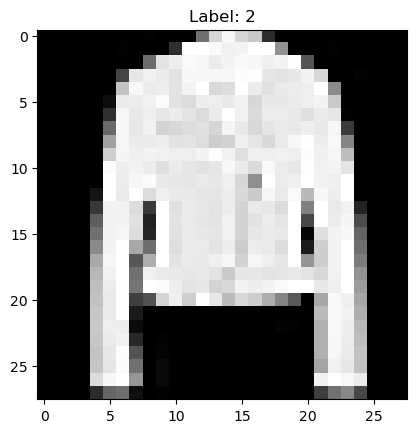

In [8]:
image, label = next(iter(trainloader)) #get first batch of data from trainloader


import matplotlib.pyplot as plt

# Select the first image in the batch
single_image = image[0]

# Convert from [1, 28, 28] to [28, 28] (remove channel dimension)
single_image = single_image.squeeze()

# Un-normalize (optional: to restore pixel values between 0 and 1)
single_image = single_image * 0.5 + 0.5

# Plot the image
plt.imshow(single_image, cmap="gray")
plt.title(f"Label: {label[20].item()}")
plt.show()


## Building the network

Here you should define your network. As with MNIST, each image is 28x28 which is a total of 784 pixels, and there are 10 classes. You should include at least one hidden layer. We suggest you use ReLU activations for the layers and to return the logits or log-softmax from the forward pass. It's up to you how many layers you add and the size of those layers.

In [10]:
# TODO: Define your network architecture here
from torch import nn
import torch.nn.functional as F

class FashionClassifier(nn.Module):
    def __init__(self):
        super().__init__()
        # Layer definitions
        self.fc1 = nn.Linear(28*28, 128)  # Input layer (784 → 128)
        self.fc2 = nn.Linear(128, 64)     # Hidden layer (128 → 64)
        self.fc3 = nn.Linear(64, 10)      # Output layer (64 → 10 classi)

    def forward(self, x):
        # Flatten the image (from [batch, 1, 28, 28] to [batch, 784])
        x = x.view(x.shape[0], -1)

        x = F.relu(self.fc1(x))     # Hidden layer 1 + ReLU
        x = F.relu(self.fc2(x))     # Hidden layer 2 + ReLU
        x = F.log_softmax(self.fc3(x), dim=1)  # Output layer + log-softmax

        return x


# Train the network

Now you should create your network and train it. First you'll want to define [the criterion](http://pytorch.org/docs/master/nn.html#loss-functions) ( something like `nn.CrossEntropyLoss`) and [the optimizer](http://pytorch.org/docs/master/optim.html) (typically `optim.SGD` or `optim.Adam`).

Then write the training code. Remember the training pass is a fairly straightforward process:

* Make a forward pass through the network to get the logits 
* Use the logits to calculate the loss
* Perform a backward pass through the network with `loss.backward()` to calculate the gradients
* Take a step with the optimizer to update the weights

By adjusting the hyperparameters (hidden units, learning rate, etc), you should be able to get the training loss below 0.4.

In [12]:
# TODO: Create the network, define the criterion and optimizer
from torch import optim, nn

# Create an instance of the model
model = FashionClassifier()

# Define the loss function and optimizer
criterion = nn.NLLLoss()                          # For log_softmax output
optimizer = optim.Adam(model.parameters(), lr=0.003)




Epoch 1/5 - Loss: 0.4958
Epoch 2/5 - Loss: 0.3834
Epoch 3/5 - Loss: 0.3517
Epoch 4/5 - Loss: 0.3292
Epoch 5/5 - Loss: 0.3165


In [13]:
# TODO: Train the network here
# Number of epochs to train
epochs = 5

# Training loop
for epoch in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        optimizer.zero_grad()                     # Clear old gradients
        log_ps = model(images)                    # Forward pass
        loss = criterion(log_ps, labels)          # Compute loss
        loss.backward()                           # Backward pass
        optimizer.step()                          # Update weights
        running_loss += loss.item()               # Track loss

    avg_loss = running_loss / len(trainloader)
    print(f"Epoch {epoch + 1}/{epochs} - Loss: {avg_loss:.4f}")

Epoch 1/5 - Loss: 0.3004
Epoch 2/5 - Loss: 0.2906
Epoch 3/5 - Loss: 0.2852
Epoch 4/5 - Loss: 0.2763
Epoch 5/5 - Loss: 0.2640


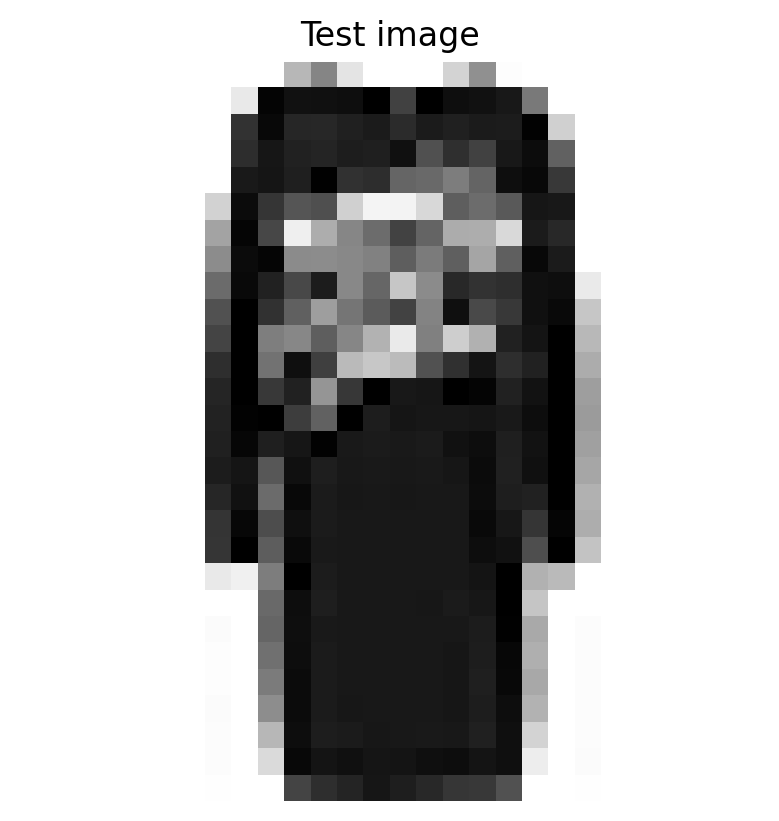

In [18]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# Test out your network!

dataiter = iter(testloader)
images, labels = next(dataiter)  
img = images[0]
# Convert 2D image to 1D vector
img = img.resize_(1, 784)

# TODO: Calculate the class probabilities (softmax) for img
ps = torch.exp(model(img))

# Plot the image and probabilities
# Plot the image
plt.imshow(images[5].squeeze(), cmap="gray_r")
plt.title("Test image")
plt.axis("off")
plt.show()